In [461]:
# --- Matrix Class --- 

import math

from Array import Array2D

class Matrix(Array2D):

    def __init__(self,numRows,numCols):
        super().__init__(numRows,numCols)
        self._shape = numRows , numCols

    # Multiple Scalar 
    def scaleBy(self,scalar):

        newMatrix = Matrix(self.numRows() , self.numCols())
        for i in range( self.numRows()):
            for j in range( self.numCols()):
                newMatrix[i,j] = self[i,j] * scalar
        return newMatrix

    # Square all data
    def square(self):
        for i in range(self.numRows()):
            for j in range(self.numCols()):
                self[i,j] = self[i,j] * self[i,j]

    def log(self):
        newMatrix = Matrix(self.numRows(), self.numCols())
        for i in range(self.numRows()):
            for j in range(self.numCols()):
                newMatrix[i,j] = math.log(self[i,j])
        return newMatrix

    def sum(self):
        total = 0
        for i in range(self.numRows()):
            for j in range(self.numCols()):
                total += self[i,j]

        return total

    # Transpose สลับแถวกับหลัก
    def transpose(self):
        newMatrix = Matrix(self.numCols() , self.numRows())
        for i in range( self.numRows()):
            for j in range( self.numCols()):
                newMatrix[j,i] = self[i,j]
        return newMatrix

    # Addition
    def __add__ ( self , rhsMatrix ) :
        assert rhsMatrix.numRows() == self.numRows() and rhsMatrix.numCols() == self.numCols() ,\
            "Matrix size not compatible for the add operation."
        newMatrix = Matrix( self.numRows() , self.numCols() )
        for i in range( self.numRows() ):
            for j in range( self.numCols() ) :
                newMatrix[i,j] = self[i,j] + rhsMatrix[i,j]
        return newMatrix
        
    # Subtraction
    def __sub__ ( self , rhsMatrix ) :
        assert rhsMatrix.numRows() == self.numRows() and rhsMatrix.numCols() == self.numCols() ,\
            "Matrix size not compatible for the add operation."
        newMatrix = Matrix( self.numRows() , self.numCols() )
        for i in range( self.numRows() ):
            for j in range( self.numCols() ) :
                newMatrix[i,j] = self[i,j] - rhsMatrix[i,j]
        return newMatrix
    
    # Element-wise Multiplication
    def __mul__ ( self , rhsMatrix):
        assert rhsMatrix.numRows() == self.numRows() and rhsMatrix.numCols() == self.numCols() ,\
            "Matrix size not compatible for the add operation."
        newMatrix = Matrix( self.numRows(), self.numCols())
        for i in range( self.numRows() ):
            for j in range( self.numCols() ) :
                newMatrix[i,j] = self[i,j] * rhsMatrix[i,j]
        return newMatrix    

    # Dot Product (Matrix Multiplication)
    def dotproduct(self,rhsMatrix):
        assert self.numCols() == rhsMatrix.numRows() , "Cannot multiply these matrices."
        newMatrix = Matrix( self.numRows() , rhsMatrix.numCols())
        for i in range(self.numRows()):
            for j in range(rhsMatrix.numCols()):
                total = 0
                for k in range(rhsMatrix.numRows()):
                     total += self[i,k] * rhsMatrix[k,j]
                newMatrix[i,j] = total
        return newMatrix

    #Load list
    def loadList(self,data):
        # Check that they has 1 row or more
        try: 
            data_column = len(data[0])
            data_row = len(data)
            assert (self.numCols() == data_column and self.numRows() == data_row) , "incorrect size to load data to matrix."
            for i in range(data_row):
                for j in range(data_column):
                    self[i,j] = data[i][j]

        except: # For the 1 row
            for i in range(len(data)):
                self[0,i] = data[i]
                


    def reshape(self,row,col):
        
        # เช็คว่าขนาดในการ Reshape เท่ากันไหม
        assert (row * col == self.numRows() * self.numCols()) , "Size couldn't fit in the Array2D"
        
        # 1 Solution - เข้าถึง matrix ก่อน แล้วดึงเข้า list เปล่า
        number_list = []
        for i in range(self.numRows()):
            for j in range(self.numCols()):
                number_list.append(self[i,j])

        # 2 Solution - เข้าถึง Matrix รูปร่างใหม่ แล้ว Assign ค่าลงไปผ่าน list เดี่ยว (ใช้ index บวกไปเรื่อยๆ)
        
        newMatrix = Array2D(row,col)
        ndx = 0

        for i in range(row):
            for j in range(col):
                newMatrix[i,j] = number_list[ndx]
                ndx += 1

        return newMatrix
    
    # Load Function - Let every data in hidden goes through the activate function.
    def loadFunction(self,activate_function):        
        for i in range(self.numRows()):
            for j in range(self.numCols()):
                self[i,j] = activate_function(self[i,j])

    # Average - compute the weighted average of all the data
    def average(self):
        total = 0
        for i in range(self.numRows()):
            for j in range(self.numCols()):
                total += self[i,j]

        average = total / (self.numRows() * self.numCols())
        return average
                
    # Trace Method (ผลบวกทแยงมุม)

    # Argmax
    def argmax_zero_axis(self):

        ''' 
            Input :
            [ [0... 30],
              [0... 30],
              [1... 30]
            ]
            แนวตั้งจะแทน ตัวข้อมูลนึง เช่น 001 , 010 , 100
        '''
        index = []
        print(self)
        for j in range(self.numCols()):

            # กำหนดให้ตัวแถวแรกเป็น max_value
            max_value = self[0, j]
            max_index = 0
            for i in range(self.numRows()):
                print(self[i,j])
                if max_value < self[i, j]:
                    max_value = self[i,j]
                    max_index = i
            else:
                index.append(max_index)

        return index

In [462]:
# --- ANN Model Class ---
import random
import math
import statistics

class ANN_Model():
    def __init__(self,file): 
        with open(file,'r') as f:
            self._RawData = f.readlines()

    def cleanData(self):

        newData = []
        resultData = []
        for row in self._RawData:
            check_row = row.split(',')
            last = check_row.pop()
            resultData.append(last[0])


            check_row = [float(num) for num in check_row]

            # Column
            current_row = []
            for column in range(len(check_row)):
                if (column != 1):
                    current_row.append(check_row[column])
  
            newData.append(current_row)

        # self.Normalization(newData,resultData)
        self._RawInputData = newData

        # result Data is ['g','b','g',...]
        rawtargetdata = [list(result) for result in resultData]
        ## We can detect it [1,0] ,[0,1]

        self._RawTargetData = rawtargetdata

        rawCleanInputData = []
        rawCleanTargetData = []

        # Remove the row that is the suspicious data
        for i in range(len(self._RawInputData)):

            rawCleanInputData.append(self._RawInputData[i][0:])
            rawCleanTargetData.append(self._RawTargetData[i])
                
        self._RawCleanInputData = rawCleanInputData
        self._RawCleanTargetData = rawCleanTargetData
        
        # Create instant variables for hyperparameter
        X = self._RawCleanInputData
        y = self._RawCleanTargetData

        self._RawCleanData = []

        # Merge and write it in the csv file to check

        for i in range(len(self._RawCleanInputData)):
            self._RawCleanData.append(self._RawCleanInputData[i] + self._RawCleanTargetData[i])


        # Sorting by the output
        self._RawCleanData = sorted(self._RawCleanData, key=lambda x: x[-1])

        import csv

        with open('rawcleandata.csv' , 'w' , encoding="UTF-8" , newline="") as f:
            writer = csv.writer(f)

            # write multiple rows
            writer.writerows(self._RawCleanData)

        self._NumData = len(X)
        self._NumInput = len(X[0])
        self._NumOutput = len(y[0])

        # after sorting the data spreading the raw data again

        self._RawCleanTargetData = []
        self._RawCleanInputData = []

        for column in self._RawCleanData:
            self._RawCleanInputData.append(column[:-1])

            if column[-1] == "g":
                self._RawCleanTargetData.append(1)
            elif column[-1] == "b":
                self._RawCleanTargetData.append(0)


        # If you are not wish to use StandardScaler or MinMaxScaler

        self._ScaledTrainData = self._RawCleanInputData
        self._ScaledTargetData = self._RawCleanTargetData


   # Rescaling Min-Max Normalization

    def StandardScaler(self):

        # Evaluate the mean and variance of all inputs

        all_input_data = []
        for i in range(len(self._RawCleanInputData)):
            for j in range(len(self._RawCleanInputData[0])):
                all_input_data.append(self._RawCleanInputData[i][j])

        # Standard Scaler = x(i) - mean / S.D -> S.D = Variance**2

        mean = statistics.mean(all_input_data)

        stdev = statistics.stdev(all_input_data)

        print("Mean : " , mean)
        print("S.D. : " , stdev)

        Scaled_Train_Data = []
        for i in range(len(self._RawCleanInputData)):

            scaled_data = []
            for j in range(len(self._RawCleanInputData[0])):
                newScale = (self._RawCleanInputData[i][j] - mean) / stdev
                scaled_data.append(newScale)

            Scaled_Train_Data.append(scaled_data)
        
        # List Concatetrating

        for i in range(len(Scaled_Train_Data)):
            Scaled_Train_Data[i] = Scaled_Train_Data[i] + [ self._RawCleanTargetData[i] ]

        self._Scaled_Data = Scaled_Train_Data

        # print(self._Scaled_Data)
        # You can shuffle there after sorting
        self._ScaledTrainData = []
        self._ScaledTargetData = []

        for column in self._Scaled_Data:
            self._ScaledTrainData.append(column[:-1])
            self._ScaledTargetData.append(column[-1])

    def MinMax_Normalization(self):
        Scaled_Train_Data = []
        for column in self._RawCleanInputData:
            scaled_data = []
            min_vals = min(column)
            max_vals = max(column)
            for value in column:
                newScale = (value - min_vals) / (max_vals - min_vals)
                scaled_data.append(newScale)

            Scaled_Train_Data.append(scaled_data)

        # List Concatetrating

        for i in range(len(Scaled_Train_Data)):
            Scaled_Train_Data[i] = Scaled_Train_Data[i] + [self._RawCleanTargetData[i]]

        self._Scaled_Data = Scaled_Train_Data

        # You can shuffle there after sorting

        self._ScaledTrainData = []
        self._ScaledTargetData = []

        for column in self._Scaled_Data:
            self._ScaledTrainData.append(column[:-1])
            self._ScaledTargetData.append(column[-1])
            
    # Data Spliting
    def splitData(self):

        self._Train_X , self._Train_y , self._Test_X , self._Test_y = [] , [] , [] , []
        
        # K-fold Cross Validation โดย k เป็น 5

        b_data = []
        g_data = []

        # Train and Test Data should be distribute at same
        for i in range(351):
            if i < 126:
                b_data.append(self._ScaledTrainData[i] + [ self._ScaledTargetData[i] ])
            else:
                g_data.append(self._ScaledTrainData[i] + [ self._ScaledTargetData[i] ])
                
        random.shuffle(b_data)
        random.shuffle(g_data)

        X_b , y_b , X_g , y_g = [] , [] , [] , []

        # Since the data is the imbalanced classification so we will make sure that
        # the minor class will have a same distribution in train and test data

        # Bad Section
        
        for i in range(len(b_data)): 
            X_b.append(b_data[i][:-1])
            y_b.append(b_data[i][-1])

        # split to train and test equally

        for i in range(len(b_data)):
            if i % 4 == 0:
                self._Test_X.append(X_b[i])
                self._Test_y.append(y_b[i])
            else:
                self._Train_X.append(X_b[i])
                self._Train_y.append(y_b[i])

        # Good Section
        for i in range(len(g_data)):
            X_g.append(g_data[i][:-1])
            y_g.append(g_data[i][-1])

        # Split to train and test equally
        
        for i in range(len(g_data)):
            if i % 4 == 0:
                self._Test_X.append(X_g[i])
                self._Test_y.append(y_g[i])
            else:
                self._Train_X.append(X_g[i])
                self._Train_y.append(y_g[i])

        # Normal Cross Validation

        # for i in range(len(self._ScaledTrainData)):
        #     if (i%5 == 4):
        #         self._Test_X.append(X[i])
        #         self._Test_y.append(y[i])
        #     else:
        #         self._Train_X.append(X[i])
        #         self._Train_y.append(y[i])

        # Shuffle the Train and Test Data

        Train_dataset , Test_dataset = [] , []

        for i in range(len(self._Train_X)):
            Train_dataset.append(self._Train_X[i] + [self._Train_y[i]])

        for i in range(len(self._Test_X)):
            Test_dataset.append(self._Test_X[i] + [ self._Test_y[i] ])

        random.shuffle(Train_dataset)
        random.shuffle(Test_dataset)

        self._Train_X , self._Train_y , self._Test_X , self._Test_y = [] , [] , [] , []

        for i in range(len(Train_dataset)):
            self._Train_X.append(Train_dataset[i][:-1])
            self._Train_y.append(Train_dataset[i][-1])

        for i in range(len(Test_dataset)):
            self._Test_X.append(Test_dataset[i][:-1])
            self._Test_y.append(Test_dataset[i][-1])

        self._NumTrain = len(self._Train_X)
        self._NumTest = len(self._Test_X)

        Input_Train = Matrix(len(self._Train_X),len(self._Train_X[0]))
        Input_Train.loadList(self._Train_X)
        # Input in matrix form
        self._Input_Train = Input_Train

        Output_Train = Matrix(1,len(self._Train_y))
        Output_Train.loadList(self._Train_y)
        # Output in matrix form
        self._Output_Train = Output_Train

        Input_Test = Matrix(len(self._Test_X), len(self._Test_X[0]))
        Input_Test.loadList(self._Test_X)
        
        self._Input_Test = Input_Test

        Output_Test = Matrix(1, len(self._Test_y))
        Output_Test.loadList(self._Test_y)

        self._Output_Test = Output_Test

    def hyperparameter(self):
        # Rules of Thumbs
        self._NumHidden = int((2/3) * (self._NumInput + self._NumOutput))
        print("No.Input Unit: ",self._NumInput)
        print("No.Hidden Layer: ", 1)
        print("No.Hidden Unit: ",self._NumHidden)
        print("No.Output Unit: ",self._NumOutput)
    
    def trainModel(self,random_state=None,epochs=50,alpha=0.01):

        # กำหนด Random Seed
        if random_state is not None:
            random.seed(random_state)
            print("Random Seed :" , random_state)
        else: 
            random.seed(42)
            print("Random Seed :" , 42)

        # Random weights between input and hidden

        # Xavier/Glorot Random weights of Normal Distribution
        # Xavier Initialization the mean will be 0 and s.d. will be 
        self._weights_input_hidden = Matrix(self._NumInput, self._NumHidden)
        for i in range(self._NumInput):
            for j in range(self._NumHidden):
                sd = math.sqrt(2 / (self._NumInput + self._NumHidden))
                self._weights_input_hidden[i, j] = random.normalvariate(0.0, sd)

        # # Random weights between hidden and output
        self._weights_hidden_output = Matrix(self._NumHidden, self._NumOutput)
        for i in range(self._NumHidden):
            for j in range(self._NumOutput):
                sd = math.sqrt(2 / (self._NumHidden + self._NumOutput))
                self._weights_hidden_output[i, j] = random.normalvariate(0.0, sd)

        Input = self._Input_Train.transpose()
        Target = self._Output_Train

        losses = []

        # Sigmoid - Activate Function 
        def sigmoid(x): # หรือ Logistic Function
            return 1 / (1 + math.exp(-x))
        
        # ReLu - Activate Function
        def relu(x):
            return max(0, x)
        
        def tanh(x):
            return (math.exp(2*x) - 1) / (math.exp(2*x) + 1)

        # Training Loop
        for epoch in range(epochs):

            random_list = [int(i) for i in range(self._NumTrain)]
            Train_seq = random.sample(random_list,self._NumTrain)

            for seq_num in range(self._NumTrain):

                # Select Column ([:,Train_seq[i]])
                input_selected_column = []
                for i in range(Input.numRows()):
                    j = Train_seq[seq_num]
                    input_selected_column.append(Input[i,j])
                
                input_selected_column_Matrix = Matrix(self._NumInput,1)
                for i in range(len(input_selected_column)):
                    input_selected_column_Matrix[i,0] = input_selected_column[i]
                
                # Feed Forward

                Hidden = self._weights_input_hidden.transpose().dotproduct(input_selected_column_Matrix)
                
                # Sigmoid Callback function
                Hidden.loadFunction(sigmoid)
                

                Output = self._weights_hidden_output.transpose().dotproduct(Hidden)
                Output.loadFunction(sigmoid)

                # --- Backpropagation Algorithm
                
                # Target Select Column - Target[:,Train_seq[seq_num]]
                target_selected_column = []
                for i in range(Target.numRows()):
                    j = Train_seq[seq_num]
                    target_selected_column.append(Target[i,j])

                
                target_selected_column_Matrix = Matrix(1,len(target_selected_column))
                for i in range(len(target_selected_column)):
                    target_selected_column_Matrix[0,i] = target_selected_column[i]

                target_selected_column_Matrix.square()

                Error = target_selected_column_Matrix - Output
                # Without no scaling factor
                Error.scaleBy(1/2)

                oneminus_Output = Matrix(Output.numRows(),Output.numCols())
                oneminus_Output.clear(1) 

                # loss = (
                # (target_selected_column_Matrix * Output.log()) +
                # (oneminus_Output - target_selected_column_Matrix) * (oneminus_Output - Output).log())
                # loss.scaleBy(-1)

                Error_wrt_output = target_selected_column_Matrix - Output
                Error_wrt_output.scaleBy(-1)

                # oneminus_Output = 1 - Output

                Output_wrt_outputLayer_LinearTransform = Output * (oneminus_Output - Output)
                OutputLayer_LinearTransform_wrt_weights_hidden_output = Hidden
                a = Error_wrt_output * Output_wrt_outputLayer_LinearTransform
                a = a.transpose()
                Error_wrt_weights_hidden_output = OutputLayer_LinearTransform_wrt_weights_hidden_output.dotproduct(a)
                
                # oneminus_Hidden = 1 - Hidden
                oneminus_Hidden = Matrix(Hidden.numRows(),Hidden.numCols())
                oneminus_Hidden.clear(1)

                HiddenLayer_activations_wrt_hiddenLayer_linearTransform = Hidden * (oneminus_Hidden - Hidden)
                OutputLayer_LinearTransform_wrt_hiddenLayer_activations = self._weights_hidden_output
                HiddenLayer_linearTransform_wrt_weights_input_hidden = input_selected_column_Matrix
                b = Output_wrt_outputLayer_LinearTransform * Error_wrt_output
                b = OutputLayer_LinearTransform_wrt_hiddenLayer_activations.dotproduct(b)
                b = HiddenLayer_activations_wrt_hiddenLayer_linearTransform * b
                b = b.transpose()
                Error_wrt_weights_input_hidden = HiddenLayer_linearTransform_wrt_weights_input_hidden.dotproduct(b)
                
                # # L2 regularization term for hidden to output weights
                # l2_hidden_output = self._weights_hidden_output.scaleBy(lmbda)

                # # L2 regularization term for input to hidden weights
                # l2_input_hidden = self._weights_input_hidden.scaleBy(lmbda)

                # # Update weights with regularization terms
                # self._weights_hidden_output = self._weights_hidden_output - (
                #     Error_wrt_weights_hidden_output.scaleBy(alpha) + l2_hidden_output
                # )
                # self._weights_input_hidden = self._weights_input_hidden - (
                #     Error_wrt_weights_input_hidden.scaleBy(alpha) + l2_input_hidden
                # )

                # #Normal Updating weights term
                self._weights_hidden_output = self._weights_hidden_output - Error_wrt_weights_hidden_output.scaleBy(alpha)
                self._weights_input_hidden = self._weights_input_hidden - Error_wrt_weights_input_hidden.scaleBy(alpha)

            epoch_loss = Error.average()
            # epoch_loss = loss.sum()

            if epoch % 10 == 0:
                print(f"Error at epoch {epoch} is {epoch_loss:.5f}")

            losses.append(epoch_loss)

        # Visualizing the error
        import matplotlib.pyplot as plt
        arange = [int(i) for i in range(1,epochs+1)]
        plt.plot(arange, losses)

    def testModel(self):
        Input = self._Input_Test.transpose()
        Target = self._Output_Test

        def sigmoid(x): # หรือ Logistic Function
            return 1 / (1 + math.exp(-x))
        
        def relu(x):
            return max(0, x)
        
        def tanh(x):
            return (math.exp(2*x) - 1) / (math.exp(2*x) + 1)

        # Forward Propogation

        Hidden = self._weights_input_hidden.transpose().dotproduct(Input)
        Hidden.loadFunction(sigmoid)

        # Calculating the output
        Output = self._weights_hidden_output.transpose().dotproduct(Hidden)
        Output.loadFunction(sigmoid)

        Output_list = [Output[0, i] for i in range(Output.numCols())]
        Target_list = [Target[0,i] for i in range(Output.numCols())]
            
        import csv

        with open('output.csv' , 'w' , encoding="UTF-8" , newline="") as f:
            writer = csv.writer(f)
            writer.writerow(Output_list)
            writer.writerow(Target_list)

        min_threshold = min(Output_list)
        max_threshold = max(Output_list)

        accuracy_list = {}
        precision_list = {}
        f1_list = {}

        while min_threshold <= max_threshold:

            Class_Output = []
            Class_Target = []

            # Iterating through the output matrix (1 x numTest)

            Class_Output = [1 if value >= min_threshold else 0 for value in Output_list]
            Class_Target = [Target[0, j] for j in range(Target.numCols())]

            self._class_output = Class_Output
            self._class_target = Class_Target

            correct = 0
            miss = 0

            conf_matrix = [ [0,0] , [0,0]]
            for i in range(self._NumTest):
                if Class_Output[i] == Class_Target[i]:
                    correct += 1
                else:
                    miss += 1
                conf_matrix[Class_Target[i]][Class_Output[i]] += 1

            accuracy = correct / self._NumTest

            # Precision, Recall, and F1 Score
            tp = conf_matrix[1][1]
            fp = conf_matrix[0][1]
            fn = conf_matrix[1][0]

            precision = tp / (tp + fp) if tp + fp != 0 else 0
            recall = tp / (tp + fn) if tp + fn != 0 else 0
            f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

            accuracy_list[min_threshold] = accuracy
            precision_list[min_threshold] = precision
            f1_list[min_threshold] = f1_score

            min_threshold += 0.0001

        # best_threshold = max(zip(accuracy_list.values() , accuracy_list.keys() ))[1]
        best_threshold = max(zip(precision_list.values() , precision_list.keys()))[1]
        
        Class_Output = []
        Class_Target = []

        # Iterating through the output matrix (1 x numTest)

        Class_Output = [1 if value >= best_threshold else 0 for value in Output_list]
        Class_Target = [Target[0, j] for j in range(Target.numCols())]

        self._class_output = Class_Output
        self._class_target = Class_Target

        correct = 0
        miss = 0

        conf_matrix = [ [0,0] , [0,0]]
        for i in range(self._NumTest):
            if Class_Output[i] == Class_Target[i]:
                correct += 1
            else:
                miss += 1
            conf_matrix[Class_Target[i]][Class_Output[i]] += 1

        accuracy = (correct / self._NumTest)

        # Precision, Recall, and F1 Score
        tp = conf_matrix[1][1]
        fp = conf_matrix[0][1]
        fn = conf_matrix[1][0]

        precision = tp / (tp + fp) if tp + fp != 0 else 0
        recall = tp / (tp + fn) if tp + fn != 0 else 0
        f1_score = 2 * (precision * recall) / (precision + recall) if precision + recall != 0 else 0

        print('Confusion Matrix (row=Actual, col=Predicted)')
        print(conf_matrix)
        print('Accuracy: {:.2f}%'.format(accuracy * 100))
        print('Precision: {:.2f}'.format(precision))
        print('Recall: {:.2f}'.format(recall))
        print('F1 Score: {:.2f}'.format(f1_score))


### 1. Python

In [463]:
import os

os.getcwd()

'c:\\Users\\folks\\Desktop\\cpe112-data-structure\\Final_Project'

In [464]:
# --- 2. Data preprocessing

myModel = ANN_Model('ionosphere_data.csv')
myModel.cleanData()

In [465]:
myModel._RawCleanData

[[1.0,
  1.0,
  -0.18829,
  0.93035,
  -0.36156,
  -0.10868,
  -0.93597,
  1.0,
  -0.04549,
  0.50874,
  -0.67743,
  0.34432,
  -0.69707,
  -0.51685,
  -0.97515,
  0.05499,
  -0.62237,
  0.33109,
  -1.0,
  -0.13151,
  -0.453,
  -0.18056,
  -0.35734,
  -0.20332,
  -0.26569,
  -0.20468,
  -0.18401,
  -0.1904,
  -0.11593,
  -0.16626,
  -0.06288,
  -0.13738,
  -0.02447,
  'b'],
 [1.0,
  1.0,
  -0.45161,
  1.0,
  1.0,
  0.71216,
  -1.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  -1.0,
  0.14516,
  0.54094,
  -0.3933,
  -1.0,
  -0.54467,
  -0.69975,
  1.0,
  0.0,
  0.0,
  1.0,
  0.90695,
  0.51613,
  1.0,
  1.0,
  -0.20099,
  0.25682,
  1.0,
  -0.32382,
  1.0,
  'b'],
 [1.0,
  0.02337,
  -0.00592,
  -0.09924,
  -0.11949,
  -0.00763,
  -0.11824,
  0.14706,
  0.06637,
  0.03786,
  -0.06302,
  0.0,
  0.0,
  -0.04572,
  -0.1554,
  -0.00343,
  -0.10196,
  -0.11575,
  -0.05414,
  0.01838,
  0.03669,
  0.01519,
  0.00888,
  0.03513,
  -0.01535,
  -0.0324,
  0.09223,
  -0.07859,
  0.00732,
  0.0,
 

In [466]:
myModel.MinMax_Normalization()

In [467]:
myModel._ScaledTrainData

[[1.0,
  1.0,
  0.40585499999999997,
  0.965175,
  0.31922,
  0.44566,
  0.032015000000000016,
  1.0,
  0.477255,
  0.75437,
  0.161285,
  0.67216,
  0.15146500000000002,
  0.24157499999999998,
  0.01242500000000002,
  0.527495,
  0.188815,
  0.665545,
  0.0,
  0.434245,
  0.27349999999999997,
  0.40972,
  0.32133,
  0.39834,
  0.367155,
  0.39766,
  0.407995,
  0.4048,
  0.442035,
  0.41687,
  0.46856,
  0.43130999999999997,
  0.487765],
 [1.0,
  1.0,
  0.27419499999999997,
  1.0,
  1.0,
  0.85608,
  0.0,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.5,
  0.0,
  0.57258,
  0.77047,
  0.30335,
  0.0,
  0.227665,
  0.150125,
  1.0,
  0.5,
  0.5,
  1.0,
  0.9534750000000001,
  0.758065,
  1.0,
  1.0,
  0.399505,
  0.62841,
  1.0,
  0.33809,
  1.0],
 [1.0,
  0.154725636143327,
  0.12937510818764064,
  0.04860654318850616,
  0.031080145404189036,
  0.12789510126363166,
  0.03216202181062836,
  0.2617794703133114,
  0.1919421845248399,
  0.1672667474467717,
  0.07995499394149212,
  0.1344988748485

In [468]:
len(myModel._ScaledTrainData)

351

In [469]:
# --- 3. Split Data --- 

myModel.splitData()

In [470]:
print("Input in matrix form :")
input_T = myModel._Input_Train.transpose()
print(input_T)

print("\nShape of Input Matrix:" , input_T._shape)

Input in matrix form :
[ 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 

In [471]:
print("Output in matrix form:")
Output_T = myModel._Output_Train
print(Output_T)

print("\nShape of Output Matrix:" , Output_T._shape)

Output in matrix form:
[ 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0 ]

Shape of Output Matrix: (1, 262)


### 4. กำหนด Hyperparameter

* Hidden Unit จะมีค่าเท่ากับ 2/3 ของ Input + Output ตามหลัก Rule of Thumbs

In [472]:
myModel.hyperparameter()

No.Input Unit:  33
No.Hidden Layer:  1
No.Hidden Unit:  22
No.Output Unit:  1


### 5. เริ่มกระบวนการ Train

Random Seed : 42


Error at epoch 0 is -0.26397
Error at epoch 10 is 0.89904
Error at epoch 20 is -0.04157
Error at epoch 30 is 0.96653
Error at epoch 40 is 0.97454
Error at epoch 50 is 0.98043
Error at epoch 60 is 0.98607
Error at epoch 70 is -0.01895
Error at epoch 80 is -0.01268
Error at epoch 90 is 0.98861


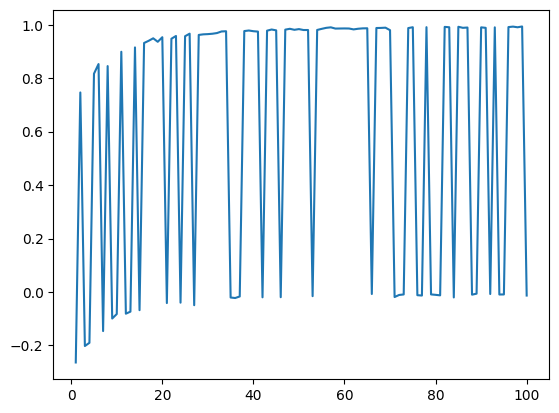

In [473]:
myModel.trainModel(42,100,0.001)

In [474]:
myModel._weights_input_hidden

[ 0.058101360076465505, -0.036678144622972184, 0.22977521570295625, -0.022441051807892354, -0.14475408952389127, 0.1105940631542243, -0.23869974765976676, 0.32847129407329295, -0.04073058288996361, 0.2969300005038701, 0.3674728967465405, 0.36566215978885996, 0.43970725216338696, -0.0719551134872818, 0.3477863179982164, 0.31847880051036037, 0.06902571723942716, -0.10083483474324922, -0.1847666900411816, -0.15687638060688164, 0.11347148281365085, -0.030170200508200094 ]
[ 0.13363676001509409, -0.3467704597431531, -0.18583813505139177, 0.06235449292326775, -0.04655321554961834, 0.18199861129128334, 0.07042513425404782, 0.247896980926105, -0.0837563641585079, 0.08952368005008635, 0.3407859709316463, -0.047576794933813955, -0.343876740066809, 0.17976831249020572, -0.17472094518727582, 0.16171662470244022, -0.21351920839930372, -0.2036300115835113, -0.332763225251152, 0.1875219680075925, 0.037857678181118425, -0.1621715189951265 ]
[ 0.045600554338835315, 0.20359198643104223, 0.19145881468251

In [475]:
myModel._weights_hidden_output

[ -0.24194266005588705 ]
[ -0.6654092582566039 ]
[ -0.040847235904792716 ]
[ -0.15467464324728525 ]
[ -0.4858410442402802 ]
[ -0.17887171096847868 ]
[ 0.18496102493182182 ]
[ -0.11921262549435051 ]
[ -0.28198498643138115 ]
[ -0.6969931237856845 ]
[ -0.9192759373404572 ]
[ -0.07639024475594326 ]
[ -0.1328163782497051 ]
[ -0.2506764555300283 ]
[ -0.911427880968286 ]
[ -0.5354052486415011 ]
[ -0.0946445003818251 ]
[ -0.3216406349864611 ]
[ -0.10236853074539841 ]
[ -0.39012075311503946 ]
[ -0.6179111858186744 ]
[ -0.2975635774206558 ]

In [476]:
myModel.testModel()

Confusion Matrix (row=Actual, col=Predicted)
[[15, 17], [17, 40]]
Accuracy: 61.80%
Precision: 0.70
Recall: 0.70
F1 Score: 0.70
